In [1]:
import tensorflow as tf
import numpy as np
import pathlib
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = 'D:\ljy\lasif data\satellite_image'

In [3]:
data_root = pathlib.Path(data_dir)

In [4]:
data_root

WindowsPath('D:/ljy/lasif data/satellite_image')

In [5]:
for item in data_root.iterdir():
    print(item)

D:\ljy\lasif data\satellite_image\airplane
D:\ljy\lasif data\satellite_image\lake


In [6]:
all_image_path = list(data_root.glob('*/*'))

In [7]:
all_image_path[:3]

[WindowsPath('D:/ljy/lasif data/satellite_image/airplane/airplane_001.jpg'),
 WindowsPath('D:/ljy/lasif data/satellite_image/airplane/airplane_002.jpg'),
 WindowsPath('D:/ljy/lasif data/satellite_image/airplane/airplane_003.jpg')]

In [8]:
all_image_path = [str(i) for i in all_image_path]

In [9]:
all_image_path[:3]

['D:\\ljy\\lasif data\\satellite_image\\airplane\\airplane_001.jpg',
 'D:\\ljy\\lasif data\\satellite_image\\airplane\\airplane_002.jpg',
 'D:\\ljy\\lasif data\\satellite_image\\airplane\\airplane_003.jpg']

In [10]:
random.shuffle(all_image_path)

In [11]:
all_image_path[:3]

['D:\\ljy\\lasif data\\satellite_image\\airplane\\airplane_320.jpg',
 'D:\\ljy\\lasif data\\satellite_image\\airplane\\airplane_426.jpg',
 'D:\\ljy\\lasif data\\satellite_image\\airplane\\airplane_429.jpg']

In [12]:
image_count = len(all_image_path)
image_count

1400

In [13]:
label_name = sorted(item.name for item in data_root.glob('*/'))
label_name

['airplane', 'lake']

In [14]:
label2index = dict((name, index) for index, name in enumerate(label_name))
label2index

{'airplane': 0, 'lake': 1}

In [15]:
index2label = dict((v,k) for k,v in label2index.items())
index2label

{0: 'airplane', 1: 'lake'}

In [16]:
all_image_label = [label2index[pathlib.Path(path).parent.name] for path in all_image_path]

In [17]:
all_image_label[:3]

[0, 0, 0]

In [18]:
all_image_path[:3]

['D:\\ljy\\lasif data\\satellite_image\\airplane\\airplane_320.jpg',
 'D:\\ljy\\lasif data\\satellite_image\\airplane\\airplane_426.jpg',
 'D:\\ljy\\lasif data\\satellite_image\\airplane\\airplane_429.jpg']

In [19]:
import IPython.display as display

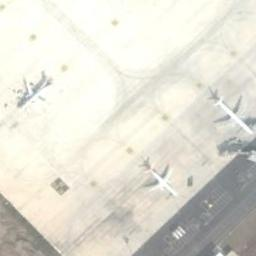

airplane
D:\ljy\lasif data\satellite_image\airplane\airplane_567.jpg


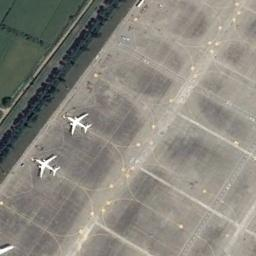

airplane
D:\ljy\lasif data\satellite_image\airplane\airplane_157.jpg


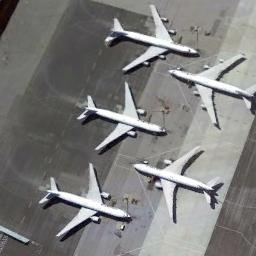

airplane
D:\ljy\lasif data\satellite_image\airplane\airplane_326.jpg


In [20]:
for n in range(3):
    image_index = random.choice(range(len(all_image_path)))
    display.display(display.Image(all_image_path[image_index]))
    print(index2label[all_image_label[image_index]])
    print(all_image_path[image_index])

In [21]:
def load_perprocess_image(img_path):
    img_raw = tf.io.read_file(img_path)
    img_tensor = tf.image.decode_jpeg(img_raw, channels=3)
    img_tensor = tf.image.resize(img_tensor, [256, 256])
    img = tf.cast(img_tensor, tf.float32) / 255
    return img

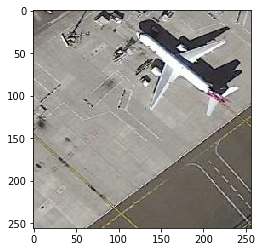

In [22]:
plt.imshow(load_perprocess_image(all_image_path[0]))

In [23]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_path)

In [24]:
path_ds

<TensorSliceDataset shapes: (), types: tf.string>

In [25]:
image_dataset = path_ds.map(load_perprocess_image)

In [26]:
image_dataset

<MapDataset shapes: (256, 256, 3), types: tf.float32>

In [27]:
label_dataset = tf.data.Dataset.from_tensor_slices(all_image_label)

In [29]:
for label in label_dataset.take(10):
    print(label.numpy())

0
0
0
0
0
0
0
0
0
1


In [32]:
dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

In [33]:
dataset

<ZipDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

(<tf.Tensor: id=116, shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.60784316, 0.5647059 , 0.54901963],
        [0.56078434, 0.5176471 , 0.5019608 ],
        [0.49411765, 0.45882353, 0.4392157 ],
        ...,
        [0.62352943, 0.6117647 , 0.5921569 ],
        [0.627451  , 0.6156863 , 0.59607846],
        [0.627451  , 0.6156863 , 0.59607846]],

       [[0.57254905, 0.5294118 , 0.5137255 ],
        [0.5411765 , 0.49803922, 0.48235294],
        [0.49803922, 0.4627451 , 0.44313726],
        ...,
        [0.6313726 , 0.61960787, 0.6       ],
        [0.61960787, 0.60784316, 0.5882353 ],
        [0.6156863 , 0.6039216 , 0.58431375]],

       [[0.58431375, 0.5411765 , 0.5254902 ],
        [0.5764706 , 0.53333336, 0.5176471 ],
        [0.5568628 , 0.52156866, 0.5019608 ],
        ...,
        [0.627451  , 0.6156863 , 0.59607846],
        [0.62352943, 0.6117647 , 0.5921569 ],
        [0.6313726 , 0.61960787, 0.6       ]],

       ...,

       [[0.65882355, 0.654902  , 0.63529414],
    